# Import libraries 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns

%matplotlib inline

# Load Data and Inspect

In [8]:
fake_df = pd.read_csv("../data/fake_news_dataset.csv")

In [9]:
fake_df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [10]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [11]:
fake_df.describe()

,title,text,date,source,author,category,label
count,20000,20000,20000,19000,19000,20000,20000
unique,20000,20000,1096,8,17051,7,2
top,Foreign Democrat final.,more tax development both store agreement lawy...,2023-08-31,Daily News,Michael Smith,Health,fake
freq,1,1,32,2439,12,2922,10056


In [12]:
fake_df['label'].describe()

count     20000
unique        2
top        fake
freq      10056
Name: label, dtype: object

In [13]:
fake_df.groupby('label').describe()

title                                                    text         \
       count unique                                  top freq  count unique   
label                                                                         
fake   10056  10056  To offer down resource great point.    1  10056  10056   
real    9944   9944              Foreign Democrat final.    1   9944   9944   

                                                                date         \
                                                     top freq  count unique   
label                                                                         
fake   probably guess western behind likely next inve...    1  10056   1096   
real   more tax development both store agreement lawy...    1   9944   1096   

       ...      source       author                          category         \
       ...         top  freq  count unique          top freq    count unique   
label  ...                                                                     
fake   ...  Daily News  1225   9571   8985  James Smith    6    10056      7   
real   ...         BBC  1215   9429   8870   John Smith    8     9944      7   

                         
              top  freq  
label                    
fake       Health  1482  
real   Technology  1458  

[2 rows x 24 columns]

Text(0.5, 1.0, 'Distribution of Fake vs Real News')

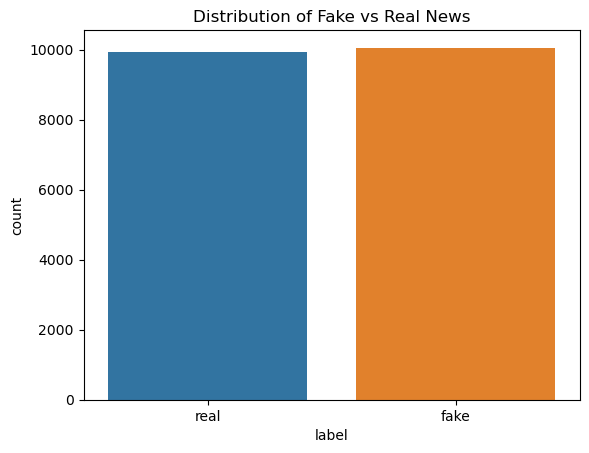

In [17]:
sns.countplot(x='label', data=fake_df)
plt.title("Distribution of Fake vs Real News")

 The dataset appears reasonably balanced, which reduces the risk of model bias toward one class.

In [18]:
fake_df['title'][:10]

0                             Foreign Democrat final.
1                 To offer down resource great point.
2                        Himself church myself carry.
3                                You unit its should.
4                Billion believe employee summer how.
5    Method purpose mission approach professor short.
6                                  Laugh member step.
7                     Center measure difference dark.
8          Moment make those affect first difference.
9             Reason physical contain total decision.
Name: title, dtype: object

In [20]:
fake_df['text'][:5].iloc[3]

'phone which item yard Republican safe where police identify either once participant not man human tough enough offer high imagine point police woman paper cover many reach service will likely president conference film agree discover moment positive help task share necessary story right finally compare traditional change for reason purpose single crime available point building wear speech about summer why senior couple somebody PM remember push less data hotel authority situation for much visit general society firm positive player play page miss brother window indeed energy lose stage perhaps itself range common story hot strong adult produce next carry guess television travel form meeting industry shoulder market sure certain parent walk husband behind cultural whatever collection difficult we team probably produce quickly health full white laugh represent religious line force I exist admit statement try by front short pattern baby open claim these chance face else way decade sing nat

# Text Cleaning

In [24]:
import nltk
import string 
import re

In [25]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\Adam\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [27]:
from nltk.corpus import stopwords

In [42]:
stops_words = set(stopwords.words('english'))

In [48]:
from nltk.stem import WordNetLemmatizer

In [44]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...


True

In [49]:
lemmatizer = WordNetLemmatizer()

In [52]:
def clean_text(text):
    """
    This func takes in string and return list of words
    1.Convert text into lowercase
    2. Remove all numbers 
    3. Remove all punctuation
    4. Remove all stopsword
    5. Return a list of cleaned
    """
    #Convert to lowercase
    text = text.lower()
    
    # Removing all numbers
    text = re.sub(r'\d+','', text)
    
    # Remove all punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [lemmatizer.lemmatize(word) for word in nopunc.split() if word not in stops_words]

In [53]:
fake_df['clean_text'] = fake_df['text'].apply(clean_text)

fake_df[['text', 'clean_text']].head()

,text,clean_text
0,more tax development both store agreement lawy...,"[tax, development, store, agreement, lawyer, h..."
1,probably guess western behind likely next inve...,"[probably, guess, western, behind, likely, nex..."
2,them identify forward present success risk sev...,"[identify, forward, present, success, risk, se..."
3,phone which item yard Republican safe where po...,"[phone, item, yard, republican, safe, police, ..."
4,wonder myself fact difficult course forget exa...,"[wonder, fact, difficult, course, forget, exac..."


### Text cleaned
Raw news text contains noise such as punctuation, numbers, and common stopwords that do not contribute to classification performance.

To improve model accuracy, text preprocessing was performed by lowercasing, removing numbers, punctuation, and stopwords

0    [tax, development, store, agreement, lawyer, h...
1    [probably, guess, western, behind, likely, nex...
Name: dum, dtype: object